In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

In [29]:
data = pd.read_csv('data/weatherHistory.csv')
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [30]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['Day'] = data['Formatted Date'].dt.dayofyear
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,253
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,253
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,253
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,253


In [31]:
my_data = data.groupby(['Year', 'Day'])['Temperature (C)'].sum().reset_index()
my_data['Temperature (C)'] = my_data['Temperature (C)'] / 24
my_data

,Year,Day,Temperature (C)
0,2005,365,0.024074
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852
...,...,...,...
4014,2016,362,0.278009
4015,2016,363,0.222222
4016,2016,364,0.167824
4017,2016,365,0.117593


Text(0, 0.5, 'Temperature (C)')

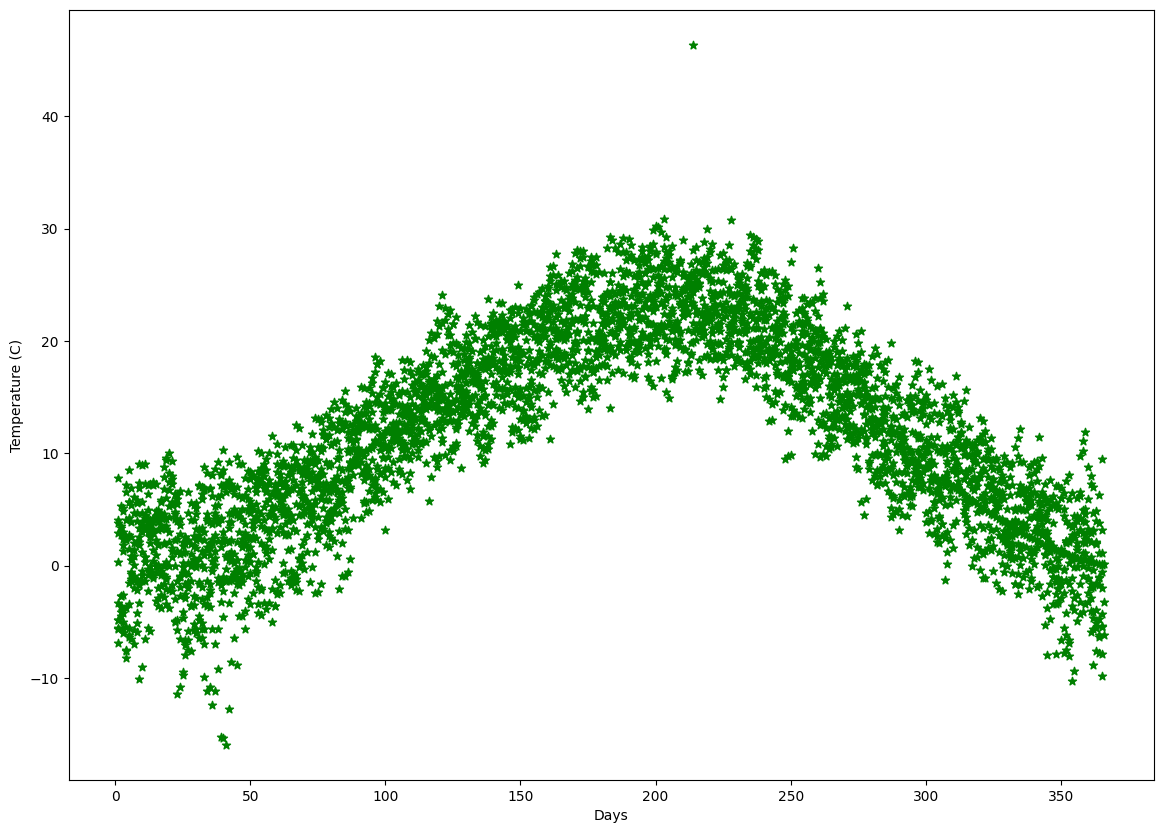

In [53]:
plt.figure(figsize=(14, 10))
plt.scatter(my_data['Day'], my_data['Temperature (C)'], marker='*', c='green')
plt.xlabel('Days')
plt.ylabel('Temperature (C)')

(4019, 1) (4019, 1)


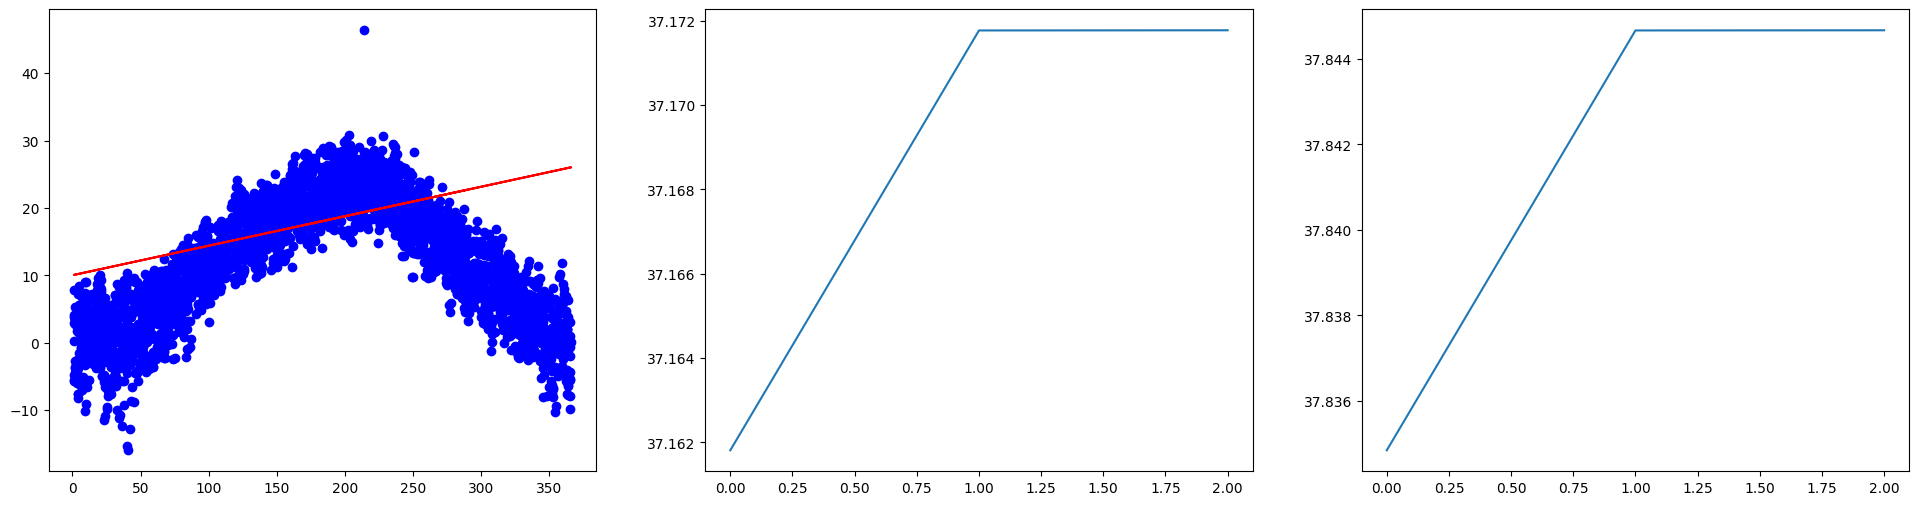

In [68]:
X = my_data['Day'].values
Y = my_data['Temperature (C)'].values

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)
perceptron_regression = Perceptron()
perceptron_regression.fit(X_train, X_test, Y_train, Y_test)


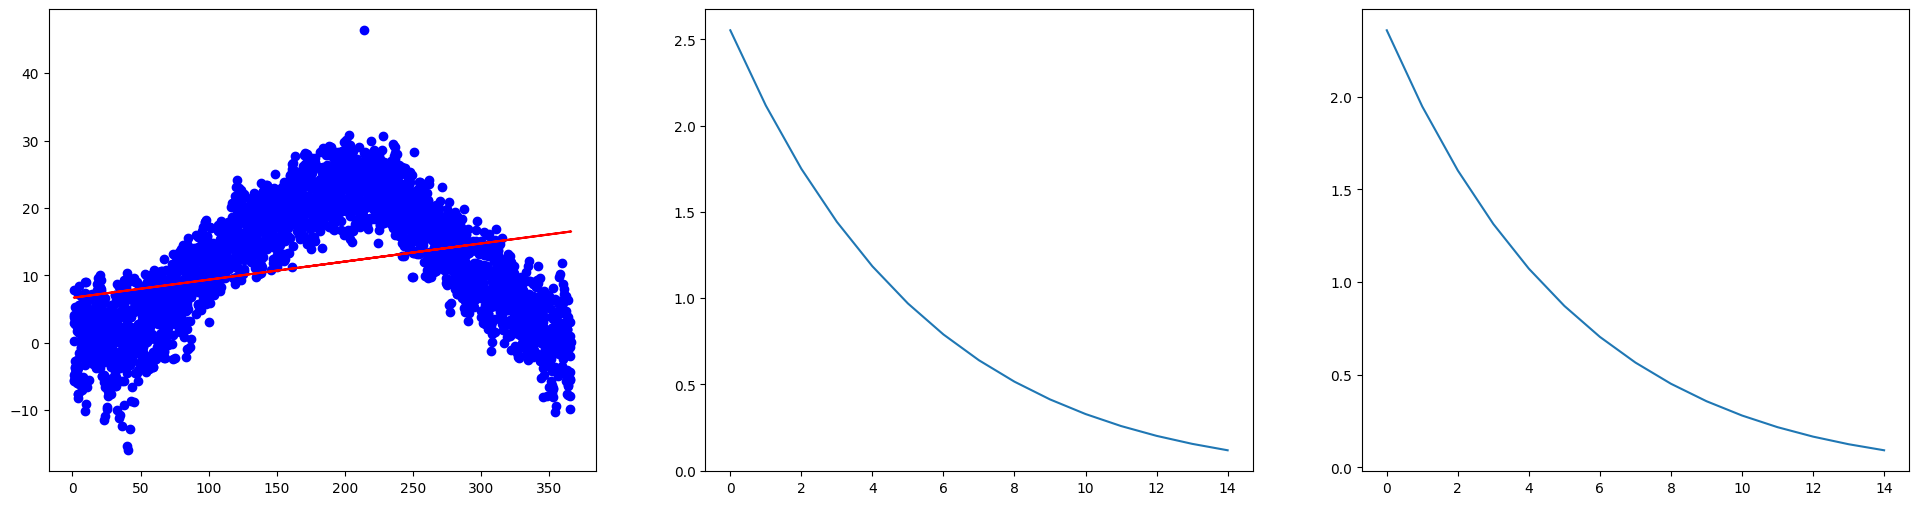

In [74]:
perceptron_regression = Perceptron(lr_w=0.000001, lr_b=0.0001, epochs=15)
perceptron_regression.fit(X_train, X_test, Y_train, Y_test)


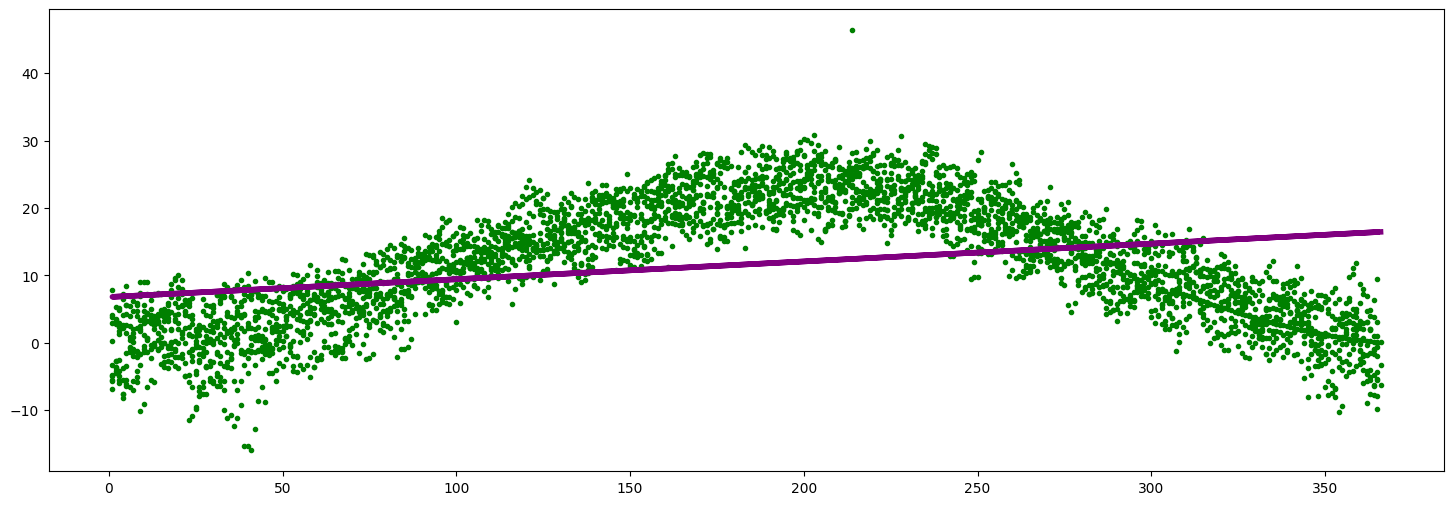

In [35]:
Y_pred = perceptron_regression.predict(X)
plt.figure(figsize=(18, 6))
plt.scatter(X, Y, marker='.', c='green')
plt.plot(X, Y_pred, color='purple', lw=4)

In [36]:
MAE = perceptron_regression.evaluate(X_test, Y_test, loss='MAE')
MSE = perceptron_regression.evaluate(X_test, Y_test, loss='MSE')

print('MAE: ', MAE)
print('MSE: ', MSE)

MAE:  7.661783881219392
MSE:  83.27453051494744


In [65]:
npy_data = np.load('weight_and_biases.npy')
npy_data

array([[[0.04377079]],

       [[0.04377079]],

       [[0.04377079]],

       ...,

       [[0.04377079]],

       [[0.04377079]],

       [[0.04377079]]])